In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
df = pd.read_csv("amazon_sales_dataset.csv")

In [10]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (10000, 21)

First 5 rows:
  order_id  order_date   ship_date delivery_date order_status customer_id  \
0   A10000  2026-01-31  2026-01-31    2026-01-08    Delivered       C5691   
1   A10001  2026-01-20  2026-02-03    2026-02-03    Delivered       C9811   
2   A10002  2026-01-15  2026-02-07    2026-01-03    Delivered       C7341   
3   A10003  2026-01-18  2026-01-15    2026-01-20    Delivered       C4012   
4   A10004  2026-01-27  2026-01-04    2026-01-23    Delivered       C1328   

        customer_name country           state                 city  ...  \
0        Ricky Potter   India  South Carolina              New Joe  ...   
1     Chris Davenport   India       Tennessee         Madisonmouth  ...   
2   Timothy Gallagher   India            Iowa       East Larryberg  ...   
3      Angela Collins   India        Kentucky  South Margaretshire  ...   
4  David Davidson DDS   India    North Dakota        Velasquezview  ...   

  product_name     category sub_category    

In [12]:
#Data Cleaning & Type Conversion
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [13]:
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
order_id          0
order_date        0
ship_date         0
delivery_date     0
order_status      0
customer_id       0
customer_name     0
country           0
state             0
city              0
product_id        0
product_name      0
category          0
sub_category      0
brand             0
quantity          0
unit_price        0
discount          0
shipping_cost     0
total_sales       0
payment_method    0
dtype: int64


In [14]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [15]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       order_id                  order_date                      ship_date  \
count     10000                       10000                          10000   
unique    10000                         NaN                            NaN   
top      A19999                         NaN                            NaN   
freq          1                         NaN                            NaN   
mean        NaN  2026-01-20 22:26:15.360000  2026-01-20 21:03:10.080000256   
min         NaN         2026-01-01 00:00:00            2026-01-01 00:00:00   
25%         NaN         2026-01-11 00:00:00            2026-01-11 00:00:00   
50%         NaN         2026-01-21 00:00:00            2026-01-21 00:00:00   
75%         NaN         2026-01-31 00:00:00            2026-01-31 00:00:00   
max         NaN         2026-02-10 00:00:00            2026-02-10 00:00:00   
std         NaN                         NaN                            NaN   

                     delivery_date order_s

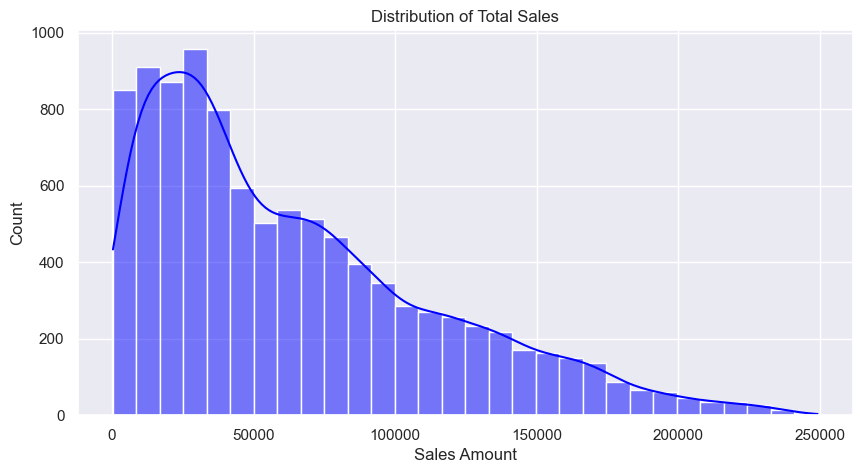

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Sales')
plt.xlabel('Sales Amount')
plt.show()

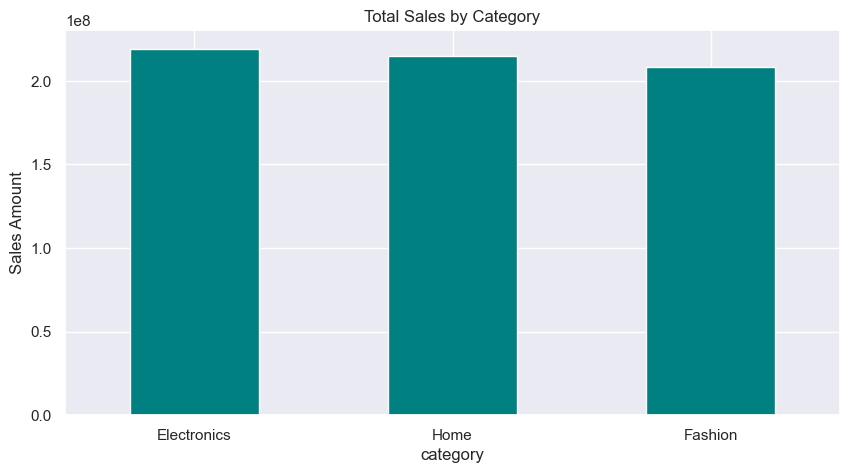

In [17]:
plt.figure(figsize=(10, 5))
cat_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
cat_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=0)
plt.show()

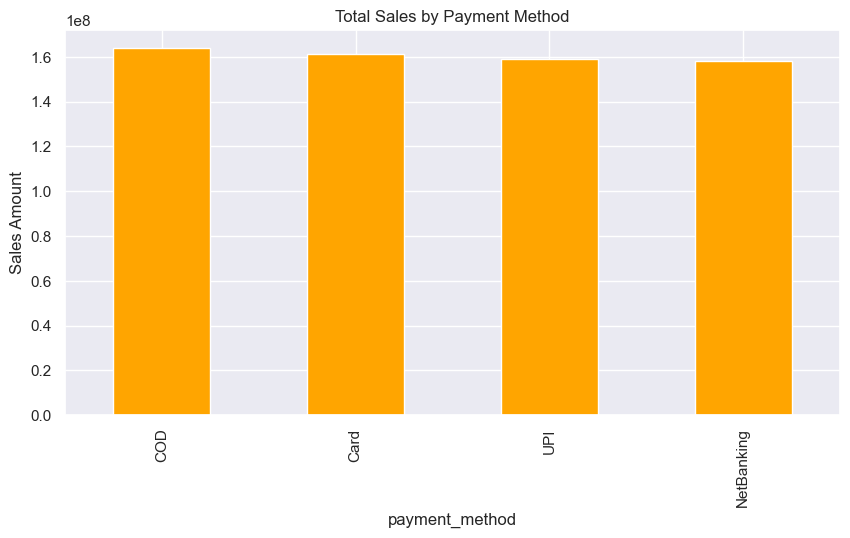

In [18]:
plt.figure(figsize=(10, 5))
pm_sales = df.groupby('payment_method')['total_sales'].sum().sort_values(ascending=False)
pm_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Payment Method')
plt.ylabel('Sales Amount')
plt.show()

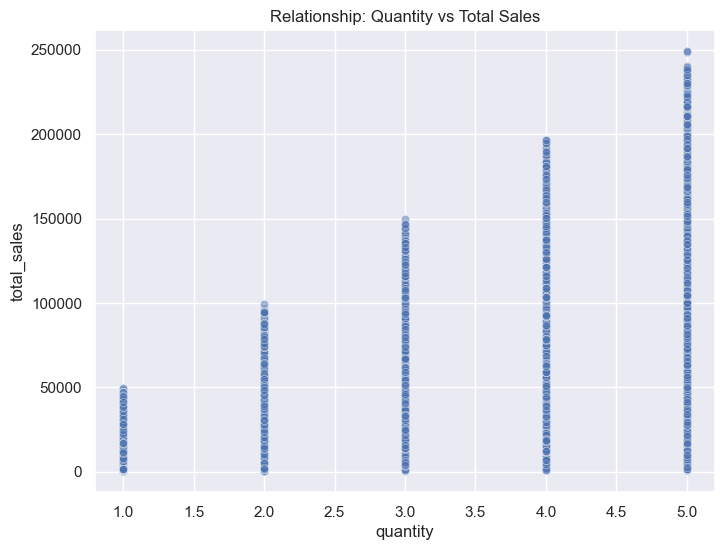

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='quantity', y='total_sales', data=df, alpha=0.5)
plt.title('Relationship: Quantity vs Total Sales')
plt.show()

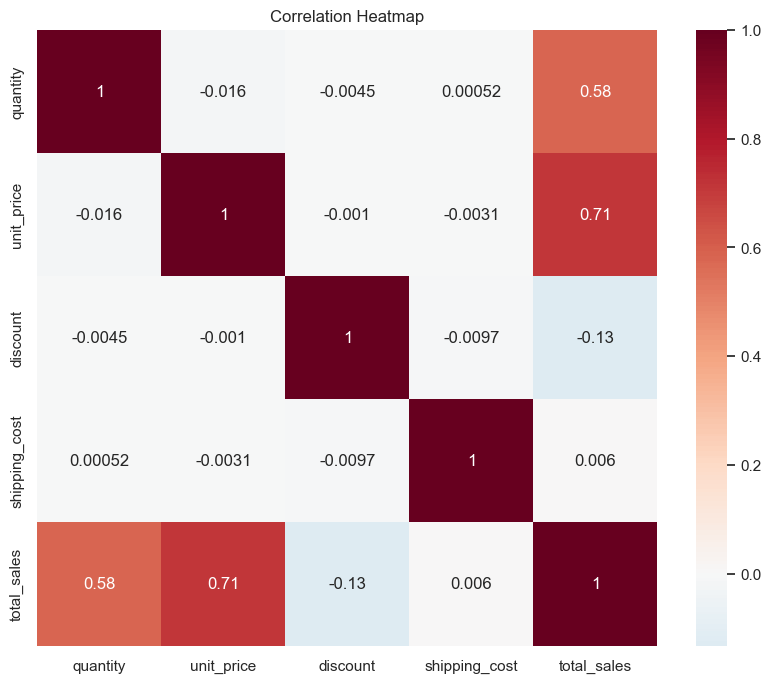

In [20]:
plt.figure(figsize=(10, 8))
# Calculating correlation only for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
df['Month'] = df['order_date'].dt.to_period('M').astype(str)
monthly_revenue = df.groupby('Month')['total_sales'].sum()

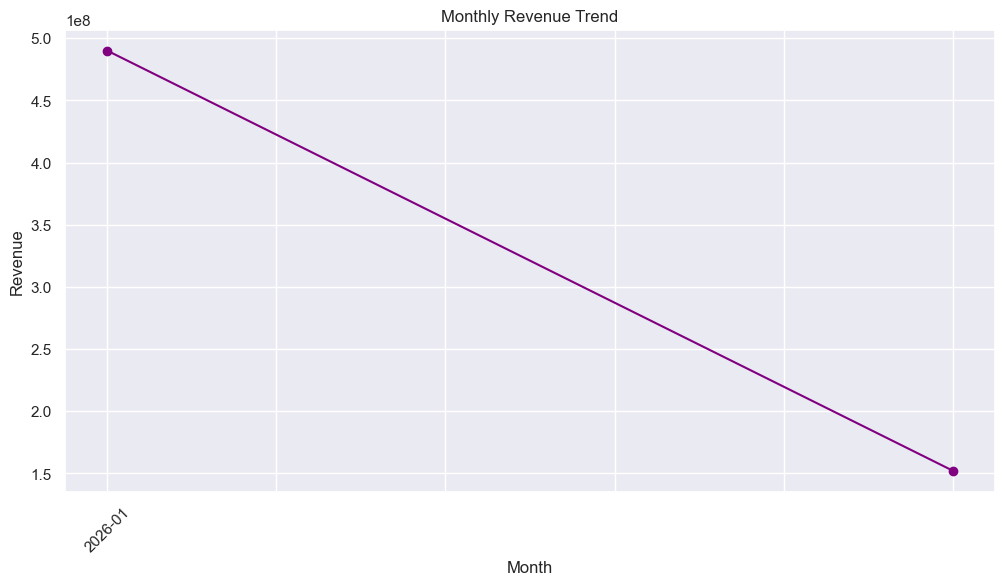

In [23]:
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

In [24]:
df.to_csv('cleaned_amazon_sales.csv', index=False)